In [9]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=24ea04f28d0603d71df2725d2aacfc43e6e674b7c73d75d91b56f2af78fd6cca
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [14]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import pylatexenc

In [16]:
from qiskit.circuit.library import QFT
qft_circ = QFT(4, inverse=False)
qft_circ.draw('text')

/tmp/ipython-input-16-214457371.py:2: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_circ = QFT(4, inverse=False)


┌──────┐
q_0: ┤0     ├
     │      │
q_1: ┤1     ├
     │  QFT │
q_2: ┤2     ├
     │      │
q_3: ┤3     ├
     └──────┘

In [17]:
qft = QuantumCircuit(4)

qft.x(1)

qft = qft.compose(qft_circ)

In [18]:
qft.draw('text')

┌──────┐
q_0: ─────┤0     ├
     ┌───┐│      │
q_1: ┤ X ├┤1     ├
     └───┘│  QFT │
q_2: ─────┤2     ├
          │      │
q_3: ─────┤3     ├
          └──────┘

In [20]:
from qiskit.quantum_info import Statevector

In [21]:
state = Statevector.from_int(0, 2**4)

# Evolve the state by the quantum circuit
state = state.evolve(qft)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

# **Problems**

1. In the implementation of QFT for $|0010\rangle$ we use `QFT(4, inverse=False)` but in the second part we use `QFT(4, inverse=True)` to find the frequency of the function. Give a good explainantion as to why we have to use inverse QFT for finding freq. of e^2ix.

A Fourier transform is a mathematical operation that decomposes a function or signal into its constituent frequencies, in the first case, In the quantum context, the computational basis states
∣
k
⟩
∣k⟩ (e.g.,
∣
0000
⟩
,
∣
0001
⟩
,
…
,
∣
1111
⟩
∣0000⟩,∣0001⟩,…,∣1111⟩) can be thought of as representing "time" or "position" points (like discrete samples of a signal) .

So we do a QFT, but in the second case  we are trying to find the frequency by encoding a continuous function,we do this by taking discrete points over the fuction graph and encoding it as the amplitudes of a superimposed quantum state, hence we do a IQFT to take us from frequncy domain to time domain.

2. Implement Fourier Transform of $sin(2x)$ and $sin(8x)$ similarly as to what I have done for $e^{2ix}$ and plot the histogram of the results.

/tmp/ipython-input-22-756582860.py:12: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_circ_inv = QFT(4, inverse=True)


Measurement counts for sin(2x): {'0010': 4717, '1110': 4883}


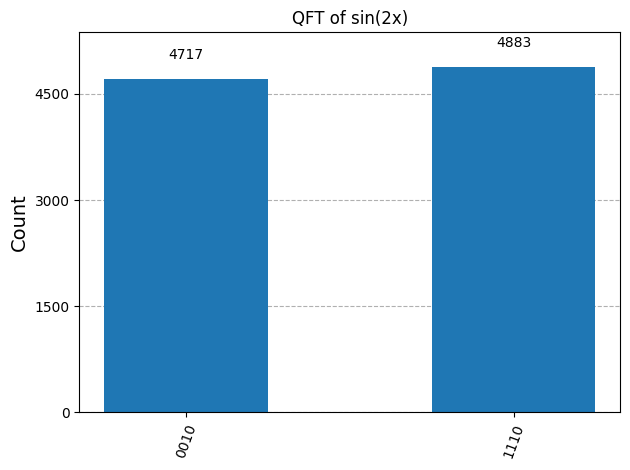

In [22]:
n_qubits = 4
num_points = 2**n_qubits
x = np.linspace(0, 2*np.pi, num_points, endpoint=False)
func_values_sin2x = np.sin(2*x)


normalized_values_sin2x = func_values_sin2x / np.linalg.norm(func_values_sin2x)
qc_sin2x = QuantumCircuit(n_qubits)
qc_sin2x.initialize(normalized_values_sin2x, range(n_qubits))


qft_circ_inv = QFT(4, inverse=True)
qc_sin2x.compose(qft_circ_inv, inplace=True)
qc_sin2x.measure_all()


simulator = AerSimulator()
qc_sin2x_comp = transpile(qc_sin2x, simulator)
result_sin2x = simulator.run(qc_sin2x_comp, shots=9600).result()
counts_sin2x = result_sin2x.get_counts()
print("Measurement counts for sin(2x):", counts_sin2x)
plot_histogram(counts_sin2x, title="QFT of sin(2x)")

/tmp/ipython-input-26-540957189.py:12: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_circ_inv = QFT(4, inverse=True)


Measurement counts for sin(8x): {'1111': 48, '0001': 36, '0000': 198, '0010': 149, '0110': 25, '1000': 2914, '1100': 1215, '1001': 363, '0101': 589, '1110': 146, '1011': 649, '0011': 839, '0111': 335, '0100': 1226, '1101': 840, '1010': 28}


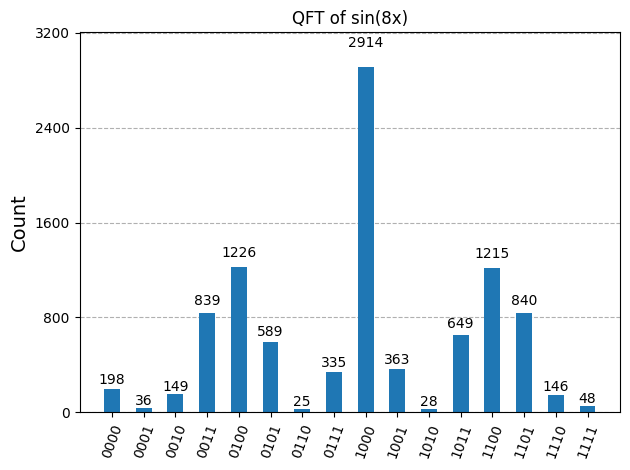

In [26]:
n_qubits = 4
num_points = 2**n_qubits
x = np.linspace(0, 2*np.pi, num_points, endpoint=False)
func_values_sin8x = np.sin(8*x)


normalized_values_sin8x = func_values_sin8x / np.linalg.norm(func_values_sin8x)
qc_sin8x = QuantumCircuit(n_qubits)
qc_sin8x.initialize(normalized_values_sin8x, range(n_qubits))


qft_circ_inv = QFT(4, inverse=True)
qc_sin8x.compose(qft_circ_inv, inplace=True)
qc_sin8x.measure_all()


simulator = AerSimulator()
qc_sin8x_comp = transpile(qc_sin8x, simulator)
result_sin8x = simulator.run(qc_sin8x_comp, shots=9600).result()
counts_sin8x = result_sin8x.get_counts()
print("Measurement counts for sin(8x):", counts_sin8x)
plot_histogram(counts_sin8x, title="QFT of sin(8x)")

3. The histogram for $sin(2x)$ shows peaks at 2 and 14. Explain why this makes sense theoretically, especially the peak at 14.

By writing the mathematical representation of
𝑠𝑖𝑛(2𝑥)=e^i2x+e^-i2x, we see that in the sine function is a superposition of two pure frequency states with frequency 2 and -2

The Quantum Fourier Transform on n qubits maps frequencies from 0 to 2
n
 −1. A negative frequency, k, is represented by the value N+k, where N=2
n
 . In our case, with n=4 qubits, N=16. Therefore, the negative frequency k=-2 is represented as:

16+(−2)=14

Thus, the QFT correctly identifies the two constituent frequencies of sin(2x) as k=2 and k=14, resulting in the two peaks observed in the histogram.

4. The histogram for $sin(8x)$ shows expected peak at 8 but this the plot has a distict different pattern (small peaks at other frequencies). This was not observed for either $e^{2ix}$ or $sin(2x)$. There is a very profound reason for this, please do some detailed research on this (maybe you find some insights related to the core principles behind DFT itself, be it classical one or its quantum counterpart). Give a detailed explaination for this pattern (Please dont write due to error, we are using noiseless AerSimulator for this).

To answer this problem let's look at the discrete values we took form the graph for Amplitude encoding

In [52]:
print(func_values_sin8x)

[ 0.00000000e+00  1.22464680e-16 -2.44929360e-16  3.67394040e-16
 -4.89858720e-16  6.12323400e-16 -7.34788079e-16  8.57252759e-16
 -9.79717439e-16  1.10218212e-15 -1.22464680e-15  4.89982516e-15
 -1.46957616e-15 -1.96067284e-15 -1.71450552e-15  5.38968388e-15]


These values are all very close to zero, i.e. when we try to sample the curve and take the information, what we are getting is a bunch of points on straight line and we are not grasping the nature of the graph this happens because

When we sample the function `sin(8x)` at N=16 points over the interval [0, 2π), we evaluate it at:
x_j = (2πj)/16, where j = 0,1,2,...,15

The exact values are:
sin(8x_j) = sin(8*(2πj)/16) = sin(πj) = 0 for all j


hence, its the poor choice of n_quibits which results this


here is what we are essentially capturing


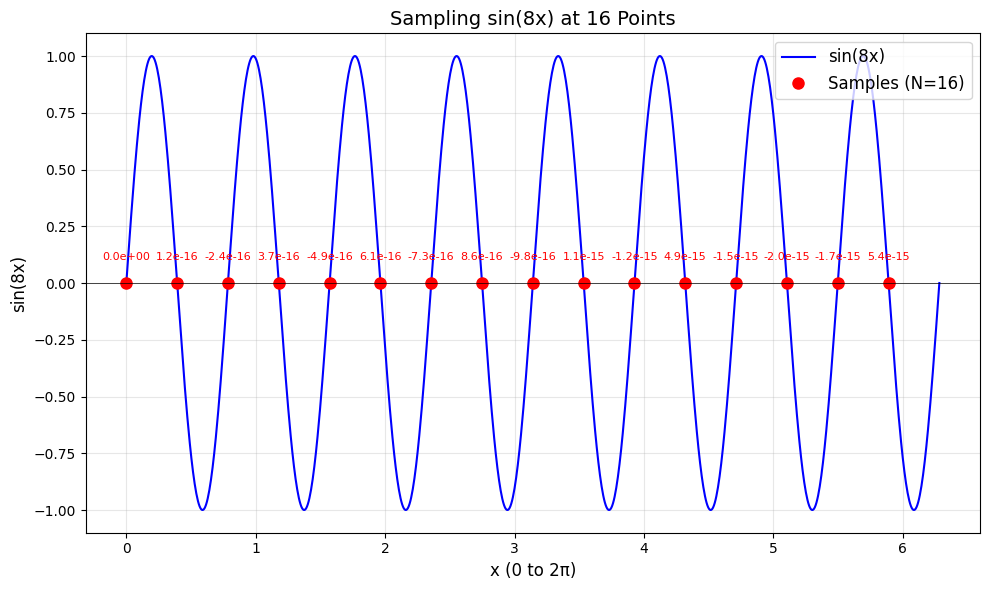

In [55]:
import numpy as np
import matplotlib.pyplot as plt


def sin8x(x):
    return np.sin(8 * x)


x_continuous = np.linspace(0, 2*np.pi, 1000)
y_continuous = sin8x(x_continuous)


N = 16
x_discrete = np.linspace(0, 2*np.pi, N, endpoint=False)
y_discrete = sin8x(x_discrete)


plt.figure(figsize=(10, 6))


plt.plot(x_continuous, y_continuous, 'b-', label='sin(8x)')


plt.plot(x_discrete, y_discrete, 'ro', markersize=8, label=f'Samples (N={N})')


plt.axhline(0, color='black', linewidth=0.5)
plt.title('Sampling sin(8x) at 16 Points', fontsize=14)
plt.xlabel('x (0 to 2π)', fontsize=12)
plt.ylabel('sin(8x)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)


for i, (x, y) in enumerate(zip(x_discrete, y_discrete)):
    plt.text(x, y+0.1, f'{y:.1e}', ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()

We can correct this by just taking more qbits, so that we actually get the characteristics of the curve.

/tmp/ipython-input-54-1741740061.py:12: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_circ_inv = QFT(8, inverse=True)


Measurement counts for sin(8x): {'11111000': 4820, '00001000': 4780}


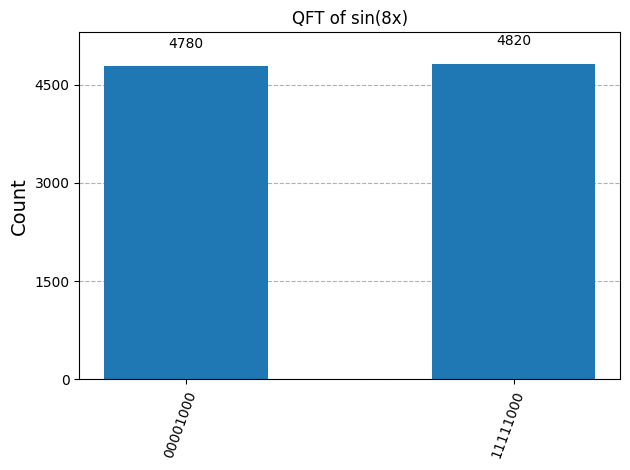

In [54]:
n_qubits = 8
num_points = 2**n_qubits
x = np.linspace(0, 2*np.pi, num_points, endpoint=False)
func_values_sin8x = np.sin(8*x)


normalized_values_sin8x = func_values_sin8x / np.linalg.norm(func_values_sin8x)
qc_sin8x = QuantumCircuit(n_qubits)
qc_sin8x.initialize(normalized_values_sin8x, range(n_qubits))


qft_circ_inv = QFT(8, inverse=True)
qc_sin8x.compose(qft_circ_inv, inplace=True)
qc_sin8x.measure_all()


simulator = AerSimulator()
qc_sin8x_comp = transpile(qc_sin8x, simulator)
result_sin8x = simulator.run(qc_sin8x_comp, shots=9600).result()
counts_sin8x = result_sin8x.get_counts()
print("Measurement counts for sin(8x):", counts_sin8x)
plot_histogram(counts_sin8x, title="QFT of sin(8x)")

The above gives the correct result. And below is the image of how we are sampling this time

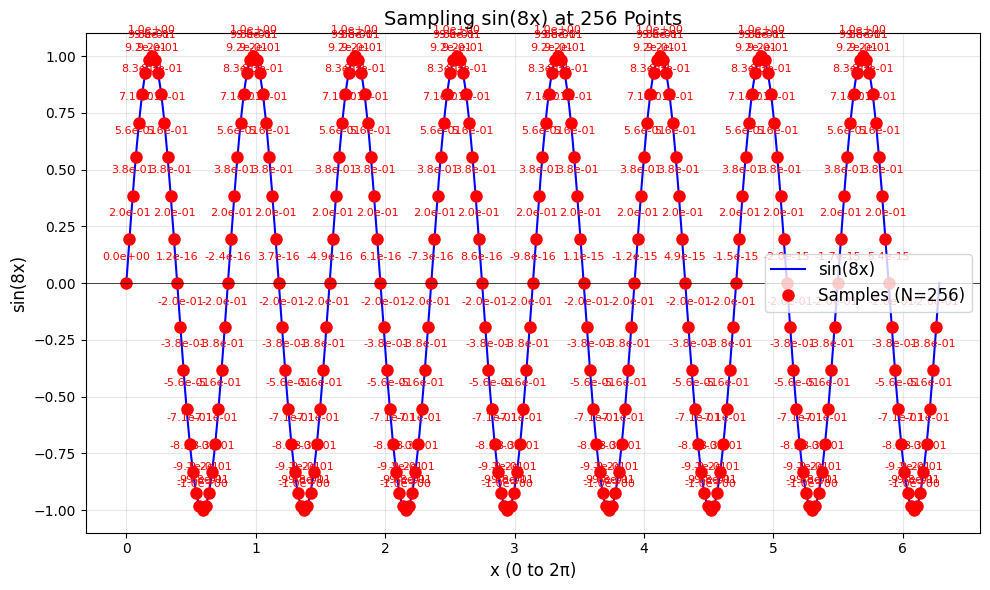

In [56]:
import numpy as np
import matplotlib.pyplot as plt


def sin8x(x):
    return np.sin(8 * x)


x_continuous = np.linspace(0, 2*np.pi, 1000)
y_continuous = sin8x(x_continuous)


N = 256
x_discrete = np.linspace(0, 2*np.pi, N, endpoint=False)
y_discrete = sin8x(x_discrete)


plt.figure(figsize=(10, 6))


plt.plot(x_continuous, y_continuous, 'b-', label='sin(8x)')


plt.plot(x_discrete, y_discrete, 'ro', markersize=8, label=f'Samples (N={N})')


plt.axhline(0, color='black', linewidth=0.5)
plt.title('Sampling sin(8x) at 256 Points', fontsize=14)
plt.xlabel('x (0 to 2π)', fontsize=12)
plt.ylabel('sin(8x)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)


for i, (x, y) in enumerate(zip(x_discrete, y_discrete)):
    plt.text(x, y+0.1, f'{y:.1e}', ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()

5. The method I have used above to load a function onto a quantum state is called Amplitude Encoding. It is a technique used in quantum computing to represent classical data within the amplitudes of a quantum state but it is often not considered optimal for practical applications. Give an explainantion as to why this is the case and also briefly describe 1-2 alternatives for this that can be used.

The first problem which I can think of is the loss of information as while Discretization we are only taking points at some intervals, while this may grasp the approximate nature of the graph, for a more complicated fuction(which might have a sharp turn or something in between the intervals) there will be information loss.

Another drawback is that for constructing the quantum state vai amplitude encoding we have to use different gates to reach such encoding,  circuit with a number of gates that scales exponentially with the number of qubits, i.e., in O(2 ^n
 ) or O(N).

One alternative I found on web is :-

Quantum Random Access Memory (QRAM): QRAM is a proposed quantum device or circuit that could address the state preparation problem of amplitude encoding. In theory, QRAM would be able to load classical data into quantum states efficiently. It would function like classical RAM, allowing for the retrieval of any data point based on a quantum address. For a dataset of size N, QRAM could potentially create a state in O(
logN) time.



# **Quantum Phase Estimation**

In [33]:
import base64

with open("theta.txt", "r") as f:
    encoded_theta = f.read()

theta = float(base64.b64decode(encoded_theta).decode())
phi = (2 * np.pi * theta) / 4  # we do this to normalise since we get result mod 1, we could just make it a value less than 1 and recover later

# You can implement controlled U^(2^j) as follows:
qc_qpe = QuantumCircuit(2)
qc_qpe.x(1)
#let j = 2
power = 2
qc_qpe.cp(theta=2**power*2*np.pi*theta, control_qubit=0, target_qubit=1)

/tmp/ipython-input-31-1758276610.py:23: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  iqft = QFT(t, inverse=True)


Most probable measurement: |1011>
Estimated phase (phi): 0.6875
Estimated Energy (theta): 2.7500


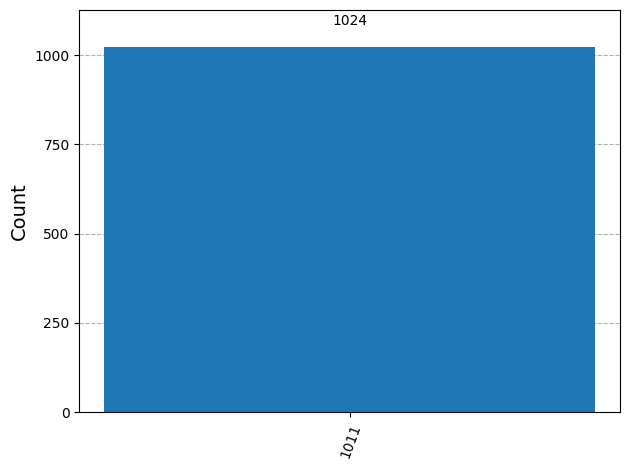

In [31]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

t = 4  # this just controls the precision of our results
n = 1
qpe_circ = QuantumCircuit(t + n, t)

qpe_circ.x(t)
qpe_circ.barrier()

qpe_circ.h(range(t))
qpe_circ.barrier()

for j in range(t):
    power_of_2 = 2**j
    angle = power_of_2 * phi
    qpe_circ.cp(angle, j, t)
qpe_circ.barrier()

iqft = QFT(t, inverse=True)
qpe_circ.append(iqft, range(t))
qpe_circ.barrier()

qpe_circ.measure(range(t), range(t))

simulator = AerSimulator()
qpe_circ_comp = transpile(qpe_circ, simulator)
result = simulator.run(qpe_circ_comp, shots=1024).result()
counts = result.get_counts()
most_probable_measurement = max(counts, key=counts.get)

m = int(most_probable_measurement, 2)
phi_estimated = m / (2**t)
theta_estimated = phi_estimated * 4

print(f"Most probable measurement: |{most_probable_measurement}>")
print(f"Estimated phase (phi): {phi_estimated:.4f}")
print(f"Estimated Energy (theta): {theta_estimated:.4f}")

plot_histogram(counts)

Checking the original theta

In [34]:
print(theta)

2.75


# **Shor's Algorithm**

Factorising 15 using a=7, just modifiying a=7 form the code given in .ipynb

In [36]:
from qiskit import QuantumRegister, ClassicalRegister
# Choose a coprime 'a'
a = 7
N = 15

# Create the quantum circuit
n_work = 4     # Work qubits (for modular arithmetic)
n_control = 2*n_work   # Control qubits (more = better precision)
qr = QuantumRegister(n_work, name='work')
qr2 = QuantumRegister(n_control, name='control')
cr = ClassicalRegister(n_control, name='measure')
qc_shor = QuantumCircuit(qr2, qr, cr)


# Initialize work register to |1⟩ (for modular exponentiation)
qc_shor.x(n_control)

# Apply Hadamard gates to control register
for qubit in range(n_control):
    qc_shor.h(qubit)

def c_amod15(a, power):
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13") # a & N must be co-prime
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

# Do controlled-U operations
for q in range(n_control):
    qc_shor.append(c_amod15(a, 2**q),[q] + [i+ n_control for i in range(4)])

# Do inverse-QFT
qc_shor.append(QFT(n_control, inverse=True), range(n_control))

# Measure circuit
qc_shor.measure(range(n_control), range(n_control))
qc_shor.draw('text',fold=-1)  # -1 means 'do not fold'

/tmp/ipython-input-36-3686907409.py:51: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc_shor.append(QFT(n_control, inverse=True), range(n_control))


┌───┐                                                                                                                             ┌───────┐┌─┐                     
control_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
           ├───┤       │                                                                                                                     │       │└╥┘┌─┐                  
control_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
           ├───┤       │              │                                                                                                      │       │ ║ └╥┘┌─┐               
control_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
           ├───┤       │              │              │                                                                                       │       │ ║  ║ └╥┘┌─┐            
control_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
           ├───┤       │              │              │              │                                                                        │  IQFT │ ║  ║  ║ └╥┘┌─┐         
control_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
           ├───┤       │              │              │              │              │                                                         │       │ ║  ║  ║  ║ └╥┘┌─┐      
control_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
           ├───┤       │              │              │              │              │               │                                         │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
control_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
           ├───┤       │              │              │              │              │               │               │                         │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
control_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
           ├───┤┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
   work_0: ┤ X ├┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           └───┘│             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
   work_1: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
                │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
   work_2: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
                │             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║

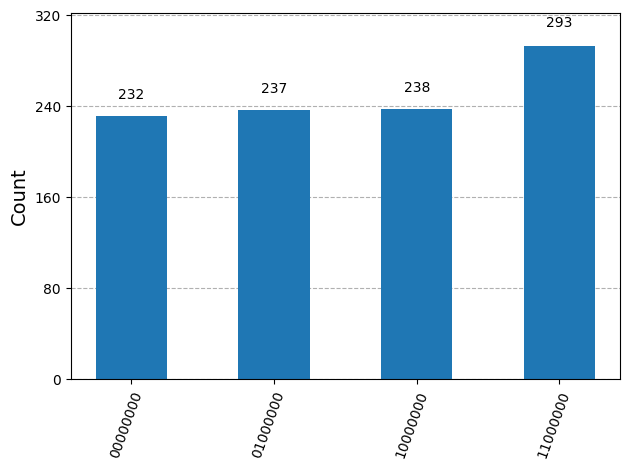

In [37]:
# Simulate
simulator = AerSimulator()
compiled_qc_shor = transpile(qc_shor, simulator)
result = simulator.run(compiled_qc_shor, shots=1000).result()
counts = result.get_counts()
plot_histogram(counts)

In [38]:
import pandas as pd

In [39]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_control)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",f"{decimal}/{2**n_control} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  10000000(bin) = 128(dec)  128/256 = 0.50
1  00000000(bin) =   0(dec)    0/256 = 0.00
2  01000000(bin) =  64(dec)   64/256 = 0.25
3  11000000(bin) = 192(dec)  192/256 = 0.75


In [40]:
from fractions import Fraction
rows = []
candidate = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)  # Find the factional form using continued fractions algorithm
    candidate.append(frac.denominator)
    rows.append([phase,
                 f"{frac.numerator}/{frac.denominator}",
                 frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.50      1/2            2
1   0.00      0/1            1
2   0.25      1/4            4
3   0.75      3/4            4


In [41]:
# Factor N
for r in candidate:
    print(f"For r = {r}")
    if r % 2 == 0:
        candidates = [np.gcd(a ** (r // 2) - 1, N), np.gcd(a ** (r // 2) + 1, N)]
        print("Factors of 15:", [c for c in candidates if c not in [1, N]])
    else:
        print("Period 'r' is odd. Try another 'a'.")

For r = 2
Factors of 15: [np.int64(3)]
For r = 1
Period 'r' is odd. Try another 'a'.
For r = 4
Factors of 15: [np.int64(3), np.int64(5)]
For r = 4
Factors of 15: [np.int64(3), np.int64(5)]


And hence we factor 15=3*5

In [49]:
phi_N=(3-1)*(5-1)
ciphertext=[14, 9, 12, 5]
e=7

In [51]:
decrypted=[]
private_key=pow(e, -1, phi_N)
for c in ciphertext:
  temp=pow(c,private_key,15)
  decrypted.append(temp)
print(decrypted)

[14, 9, 3, 5]
